In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os, shutil

In [0]:
!ls "/content/gdrive/Shared drives/brillio practicum"

 4-4-19_varmacall.txt
'5.2-using-convnets-with-small-datasets (6).ipynb'
'Copy of 5.2-using-convnets-with-small-datasets (6).ipynb'
 Logos_Sorted
 spring_ppt.gslides
'Videos - LA Lakers'
'Winter Deliverable.gdoc'


In [0]:
base_dir = '/content/gdrive/Shared drives/brillio practicum/Logos_Sorted'

In [0]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


In [0]:
train_AAA_dir = os.path.join(train_dir, 'AAA')
validation_AAA_dir = os.path.join(validation_dir, 'AAA')
test_AAA_dir = os.path.join(test_dir, 'AAA')

In [0]:
train_AmericanExpress_dir = os.path.join(train_dir, 'AmericanExpress')
validation_AmericanExpress_dir = os.path.join(validation_dir, 'AmericanExpress')
test_AmericanExpress_dir = os.path.join(test_dir, 'AmericanExpress')

In [0]:
train_StateFarm_dir = os.path.join(train_dir, 'StateFarm')
validation_StateFarm_dir = os.path.join(validation_dir, 'StateFarm')
test_StateFarm_dir = os.path.join(test_dir, 'StateFarm')

As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [0]:
print('total training AAA images:', len(os.listdir(train_AAA_dir)))
print('total validation AAA images:', len(os.listdir(validation_AAA_dir)))
print('total test AAA images:', len(os.listdir(test_AAA_dir)))

total training AAA images: 401
total validation AAA images: 51
total test AAA images: 51


In [0]:
print('total training American Express images:', len(os.listdir(train_AmericanExpress_dir)))
print('total validation American Express images:', len(os.listdir(validation_AmericanExpress_dir)))
print('total test American Express images:', len(os.listdir(test_AmericanExpress_dir)))

total training American Express images: 401
total validation American Express images: 51
total test American Express images: 50


In [0]:
print('total training State Farm images:', len(os.listdir(train_StateFarm_dir)))
print('total validation State Farm images:', len(os.listdir(validation_StateFarm_dir)))
print('total test State Farm images:', len(os.listdir(test_StateFarm_dir)))

total training State Farm images: 401
total validation State Farm images: 51
total test State Farm images: 50


In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

W0805 15:51:19.098511 140046754645888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 15:51:19.148658 140046754645888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 15:51:19.157303 140046754645888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 15:51:19.205121 140046754645888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W0805 15:51:24.268858 140046754645888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 15:51:24.282269 140046754645888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 1197 images belonging to 3 classes.
Found 147 images belonging to 3 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 3)


In [0]:
h = model.fit_generator(
      train_generator,
      steps_per_epoch=60,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10)

W0805 15:51:41.696158 140046754645888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 15:51:41.947397 140046754645888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
60/60 [==============================] - 486s 8s/step - loss: 0.7514 - acc: 0.6733 - val_loss: 0.4631 - val_acc: 0.7487
Epoch 2/100
60/60 [==============================] - 101s 2s/step - loss: 0.2241 - acc: 0.9225 - val_loss: 0.0932 - val_acc: 0.9733
Epoch 3/100
60/60 [==============================] - 101s 2s/step - loss: 0.1049 - acc: 0.9667 - val_loss: 0.0538 - val_acc: 0.9893
Epoch 4/100
60/60 [==============================] - 101s 2s/step - loss: 0.0575 - acc: 0.9808 - val_loss: 0.0509 - val_acc: 0.9770
Epoch 5/100
60/60 [==============================] - 100s 2s/step - loss: 0.0304 - acc: 0.9908 - val_loss: 0.0264 - val_acc: 0.9947
Epoch 6/100
60/60 [==============================] - 99s 2s/step - loss: 0.0273 - acc: 0.9875 - val_loss: 0.0256 - val_acc: 0.9893
Epoch 7/100
60/60 [==============================] - 99s 2s/step - loss: 0.0128 - acc: 0.9942 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 8/100
60/60 [==============================] - 99s 2s/step - loss: 0.005

In [0]:
model.save('cats_and_dogs_small_1.h5')

Let's plot the loss and accuracy of the model over the training and validation data during training:

In [0]:
acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

In [0]:
epochs = range(len(acc))

In [0]:
len(epochs)

100

In [0]:
len(acc)

100

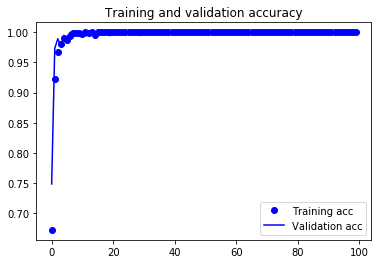

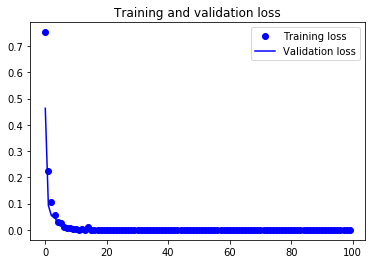

In [0]:
import matplotlib.pyplot as plt

#acc = history.history['acc']
#val_acc = history.history['val_acc']
#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()